In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
wine = pd.read_csv('wine_data.csv')

In [3]:
wine

,A,B,C,D,E,F,G,H,I,J,K,L,M,output
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
# Renaming the columns from the dataset
wine.rename(columns = {'A':'Type', 'B':'alcohol', 'C':'malic acid', 'D':'ash', 'E':'ash alkalinity', 'F':'magnesium', 'G':'total phenols', 'H':'flavanoids', 'I':'nonflavanoid phenols', 'J':'proanthocyanins','K':'colour intensity', 'L':'hue', 'M':'OD280/OD315 of diluted wines', 'output':'proline'}, inplace = True)

In [7]:
wine

,Type,alcohol,malic acid,ash,ash alkalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
wine.shape

(178, 14)

In [9]:
wine.describe()

,Type,alcohol,malic acid,ash,ash alkalinity,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,colour intensity,hue,OD280/OD315 of diluted wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

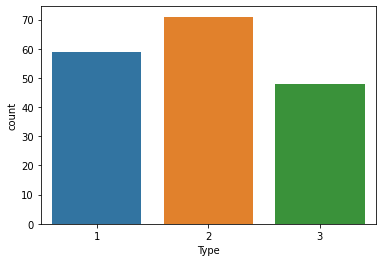

In [21]:
sns.countplot(wine['Type'])

# This shows the count of the various quality of wine we have with
# 1 representing High quality
# 2 representing Medium quality
# 3 representing Low quality

In [10]:
x = wine.drop('Type', axis = 1)
y = wine['Type']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [14]:
scaler = MinMaxScaler()

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train

array([[0.72043011, 0.20378151, 0.53763441, ..., 0.48717949, 1.        ,
        0.5854251 ],
       [0.31989247, 0.08403361, 0.31182796, ..., 0.27350427, 0.64102564,
        0.        ],
       [0.60215054, 0.71218487, 0.48387097, ..., 0.04273504, 0.10622711,
        0.42348178],
       ...,
       [0.37365591, 0.1512605 , 0.44623656, ..., 0.44444444, 0.61904762,
        0.02672065],
       [0.77150538, 0.16596639, 0.40860215, ..., 0.31623932, 0.75457875,
        0.54493927],
       [0.84139785, 0.34033613, 0.60215054, ..., 0.06837607, 0.16117216,
        0.28178138]])

In [22]:
# Using Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [23]:
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.90      1.00      0.95        19
           2       1.00      0.86      0.93        22
           3       0.93      1.00      0.96        13

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



In [24]:
print(accuracy_score(y_test,y_pred))

0.9444444444444444


# This means our classification model has an accuracy of 94% which is very good for our prediction